In [16]:
# Basic imports
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [17]:
# Data Evaluation function
def data_evaluation(data):
    """Function to See the Data Evaluation, sees shape, head and describe

    Args:
        data (dataframe): Pandas Dataframe
    """
    print(f"{data.Name} Shape: {data.shape}")
    print(f"{data.Name} Head:\n{data.head()} ")
    print(f"{data.Name} Summary Statistics:\n{data.describe()}")
    print("\n")
    print(f"{data.Name} Columns:\n{data.columns}")

In [18]:
%store -r humidity
%store -r temperature
humidity.Name = 'humidity'
temperature.Name = 'temperature'
# Data Processing starts from here
if 'context_humidity' in humidity.columns:
    # Drop context Frame
    humidity.drop('context_humidity', axis=1, inplace=True)
if 'context_temperature' in temperature.columns:
    temperature.drop('context_temperature', axis = 1, inplace=True)

# See the data after droping the context coloumn
print("After Dropping Context: ")
data_evaluation(humidity)
data_evaluation(temperature)

# Remove Zero from the dataset
humidity = humidity[humidity['humidity'] != 0]
temperature = temperature[temperature['temperature'] != 0]

humidity.Name = 'humidity'
temperature.Name = 'temperature'
# See the data after removing zeroes
print("Removing Zeroes: ")
data_evaluation(humidity)
data_evaluation(temperature)

After Dropping Context: 
humidity Shape: (1588, 3)
humidity Head:
       timestamp  humidity               date (Asia/Kolkata)
0  1694955053748      92.0  2023-09-17 18:20:53.748000+05:30
1  1694954292122      91.0  2023-09-17 18:08:12.122000+05:30
2  1694935992451      69.0  2023-09-17 13:03:12.451000+05:30
3  1694935611126      70.0  2023-09-17 12:56:51.126000+05:30
4  1694935229794      70.0  2023-09-17 12:50:29.794000+05:30 
humidity Summary Statistics:
          timestamp    humidity
count  1.588000e+03  1588.00000
mean   1.693464e+12    75.52330
std    6.966737e+08    18.93607
min    1.692674e+12     0.00000
25%    1.692877e+12    62.00000
50%    1.693243e+12    80.00000
75%    1.694081e+12    95.00000
max    1.694955e+12    95.00000


humidity Columns:
Index(['timestamp', 'humidity', 'date (Asia/Kolkata)'], dtype='object')
temperature Shape: (1652, 3)
temperature Head:
       timestamp  temperature               date (Asia/Kolkata)
0  1694955052848    28.100000  2023-09-17 18:20

merged frame Shape: (1579, 6)
merged frame Head:
     timestamp_x  humidity             date (Asia/Kolkata)_x   timestamp_y  \
0  1692673514360      95.0  2023-08-22 08:35:14.360000+05:30  1.692674e+12   
1  1692674658781      95.0  2023-08-22 08:54:18.781000+05:30  1.692675e+12   
2  1692675040305      95.0  2023-08-22 09:00:40.305000+05:30  1.692675e+12   
3  1692675803636      95.0  2023-08-22 09:13:23.636000+05:30  1.692676e+12   
4  1692676185130      95.0  2023-08-22 09:19:45.130000+05:30  1.692676e+12   

   temperature             date (Asia/Kolkata)_y  
0    27.500000  2023-08-22 08:35:13.357000+05:30  
1    28.100000  2023-08-22 08:54:17.785000+05:30  
2    28.299999  2023-08-22 09:00:39.547000+05:30  
3    28.799999  2023-08-22 09:13:22.477000+05:30  
4    29.200001  2023-08-22 09:19:44.124000+05:30   
merged frame Summary Statistics:
        timestamp_x     humidity   timestamp_y  temperature
count  1.579000e+03  1579.000000  1.568000e+03  1568.000000
mean   1.693461e+12   

/tmp/ipykernel_3247/793387220.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  humidity['Datetime'] = pd.to_datetime(humidity['timestamp'], unit='ms')
/tmp/ipykernel_3247/793387220.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temperature['Datetime'] = pd.to_datetime(temperature['timestamp'], unit='ms')
/tmp/ipykernel_3247/793387220.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas

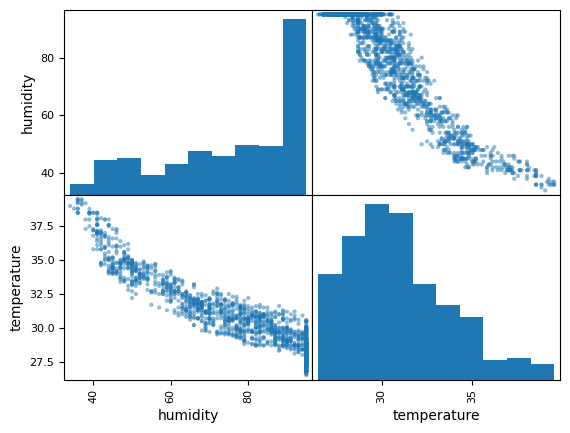

Mean and std before scale 
[75.91517857 30.93482145]
[18.10562333  2.73858936]


[ 7.25043608e-17 -2.17513082e-16]
[1. 1.]


In [19]:
#Normalization of data
# Convert Unix timestamps to datetime objects
humidity['Datetime'] = pd.to_datetime(humidity['timestamp'], unit='ms')
temperature['Datetime'] = pd.to_datetime(temperature['timestamp'], unit='ms')

# Sort both DataFrames by the 'Datetime' column
humidity.sort_values(by='Datetime', inplace=True)
temperature.sort_values(by='Datetime', inplace=True)

# Set the tolerance in seconds
tolerance = pd.Timedelta(seconds=10)

# Merge dataframes based on the common timestamps within the tolerance
merged_df = pd.merge_asof(humidity, temperature,
                          on='Datetime', direction='nearest', tolerance=tolerance)

# Drop the 'Datetime' column as it's no longer needed
merged_df.drop(columns=['Datetime'], inplace=True)
merged_df.Name = 'merged frame'
data_evaluation(merged_df)

X = merged_df[['humidity', 'temperature']]

X = X.dropna()

# Data Visualization before Scaling
scatter_matrix(merged_df.iloc[:,[1,4]])
plt.savefig("../output/n_plot_merged.png")
plt.show()

# Do the Scaling
# instantiate the scaler
scale = StandardScaler()
# compute the mean and std to be used later for scaling
scale.fit(X)
# This are raw values
print("Mean and std before scale ")
print(scale.mean_)
print(scale.scale_)
print("\n")

# Now we Transform/Scale the data around 0,0
X_scaled = scale.transform(X)
# Let’s do a sanity check to see if each feature is centered at 0 and has a std of 1:
print(X_scaled.mean(axis=0))  # Mean comes down almost to zero, as data is scaled around 0,0
print(X_scaled.std(axis=0))

In [20]:
%store X_scaled

Stored 'X_scaled' (ndarray)
